### Алгоритм Грэхема ### 
— алгоритм построения выпуклой оболочки в двумерном пространстве. В этом алгоритме задача о выпуклой оболочке решается с помощью стека, сформированного из точек-кандидатов. Все точки входного множества заносятся в стек, а потом точки, не являющиеся вершинами выпуклой оболочки, со временем удаляются из него. По завершении работы алгоритма в стеке остаются только вершины оболочки в порядке их обхода против часовой стрелки.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
def plot_Q_S(Q_copy, S):
    S.append(S[0]) #замыкаем множество S

    fig = plt.figure()

    X, Y = [], []
    for p in Q_copy: 
        X.append(p[0])
        Y.append(p[1])

    plt.plot(X,Y,'go')
    fig.show()

    X, Y = [], []  
    for s in S:
        X.append(s[0])
        Y.append(s[1])


    plt.plot(X,Y)
    fig.show()


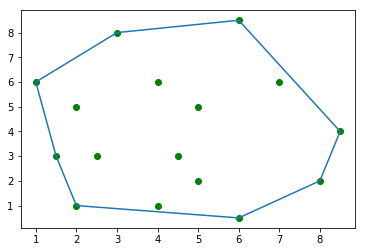

In [167]:


import numpy as np
import math
import copy

def not_left_turn(a,b,c):
    Ux = (b[0] - a[0])
    Vy = (c[1] - b[1])
    Uy = (b[1] - a[1])
    Vx = (c[0] - b[0])
    
    #условие не левого поворота, которое должно выполняться
    if (Ux*Vy - Uy*Vx)<0: 
        return True
    else:
        return False

def cmp(x_, y_):
    
    #перенос системы координат, т.к измеряется полярный угол относительно p0
    x = x_ - p0[0]   
    y = y_ - p0[1]
    
    #вычисление полярного угла
    if x>0 and y>=0:
        return abs(math.atan(y/x))
    if x>0 and y<0:
        return abs(math.atan(y/x) + 2*math.pi)
    if x<0:
        return abs(math.atan(y/x) + math.pi)
    if x==0 and y>0:
        return abs(math.pi/2)
    if x==0 and y<0:
        return abs(3*math.pi/2)

Q = [(1, 6), (1.5, 3), (2, 1), (2, 5), (3, 8), (2.5, 3), (4, 6), (5, 5), (4, 1), (4.5, 3), (6, 8.5), (7, 6), (5, 2), (6, 0.5), (8, 2), (8.5, 4)]
Q_copy = copy.copy(Q)

p0 = (min(lst, key=lambda x: x[1])) #— точка из множества Q с минимальной координатой y
Q.remove(p0)

Q.sort(key = lambda x: cmp(x[0],x[1])) #остальные точки множества Q, 
                                       #отсортированные в порядке возрастания полярного угла, относительно p0

S = [p0, Q[0]] #типа стэк

Q = Q[1:]      #нужен список без добавленных в S элементов

for p in Q:
    while(not_left_turn(S[-2], S[-1], p)):
        del S[-1]
    S.append(p)
        

plot_Q_S(Q_copy, S)